In [1]:
# Import the standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data using the pandas data frame
data=pd.read_csv("C://Users//vinod//Downloads//Sales_Inventory_Dataset.csv")
data.head()

,order_id,order_date,product_id,product_name,quantity,sold_price,customer_id,region
0,101,1-Jan-25,ST01,black pen,1,5,C001,EAST
1,102,2-Jan-25,ST02,pencil,5,10,C005,WEST
2,103,3-Jan-25,ST03,blue pen,20,60,C004,WEST
3,104,4-Jan-25,ST03,blue pen,8,24,C125,NORTH
4,105,5-Jan-25,ST04,red pen,3,15,C475,EAST


In [3]:
# All information about the data set
def all_information(data):
    print(f'The data set contains {data.shape}')
    print('*-'*50)
    print(f'The null values in the data set  {data.isna().sum()}')
    print('$-'*50)
    print(f'Checking the duplicate values  {data.duplicated().sum()}')
    print('$-'*50)
    data.info()
all_information(data)

The data set contains (238, 8)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
The null values in the data set  order_id        0
order_date      0
product_id      1
product_name    1
quantity        0
sold_price      0
customer_id     3
region          0
dtype: int64
$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-
Checking the duplicate values  0
$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-$-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      238 non-null    int64 
 1   order_date    238 non-null    object
 2   product_id    237 non-null    object
 3   product_name  237 non-null    object
 4   quantity      238 non-null    int64 
 5   sold_price    238 non-null    int64 
 6 

In [4]:
#Checking the all the information with data
data.describe().style.background_gradient(cmap='Reds')

,order_id,quantity,sold_price
count,238.000000,238.000000,238.000000
mean,219.500000,7.105042,27.747899
std,68.848868,5.124762,29.294581
min,101.000000,1.000000,2.000000
25%,160.250000,4.000000,10.000000
50%,219.500000,6.000000,20.000000
75%,278.750000,8.000000,40.000000
max,338.000000,20.000000,200.000000


In [5]:
# Fill the null values
'''
In The dataset contains less values but three columns are categorical
columns we should fill the values with mode value using the pandas mode 
function
'''
data['product_id']=data['product_id'].fillna(value=data['product_id'].mode()[0])
data['product_name']=data['product_name'].fillna(value=data['product_name'].mode()[0])
data['customer_id']=data['customer_id'].fillna(value=data['customer_id'].mode()[0])
data.isna().sum()

order_id        0
order_date      0
product_id      0
product_name    0
quantity        0
sold_price      0
customer_id     0
region          0
dtype: int64

# Explore Data Analysis Process

In [6]:
# We Extract the month from the above data
data['month']=data['order_date'].str.split('-').str[1]
data.head()

,order_id,order_date,product_id,product_name,quantity,sold_price,customer_id,region,month
0,101,1-Jan-25,ST01,black pen,1,5,C001,EAST,Jan
1,102,2-Jan-25,ST02,pencil,5,10,C005,WEST,Jan
2,103,3-Jan-25,ST03,blue pen,20,60,C004,WEST,Jan
3,104,4-Jan-25,ST03,blue pen,8,24,C125,NORTH,Jan
4,105,5-Jan-25,ST04,red pen,3,15,C475,EAST,Jan


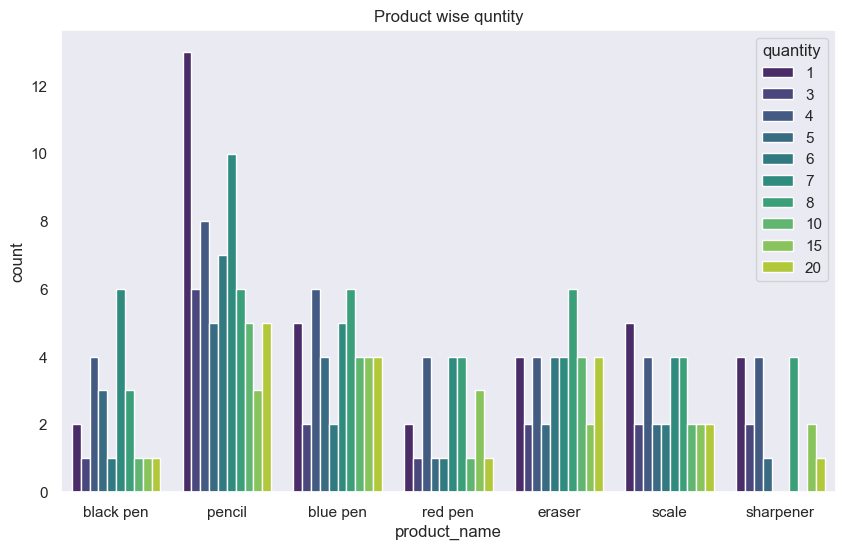

In [7]:
'''
Create a Barplot visualize the each product and quanity solds in the data

'''

plt.figure(figsize=(10,6))
sns.set_theme(style='dark')
sns.countplot(data=data,x='product_name',hue='quantity',palette='viridis')
plt.title('Product wise quntity')
plt.show()

# Observations:
1. From The above Data Pencil one quanity is purchased more than 12 times 7quanity purchase 10 times.
2. In Pencil we sold 20 quantity was purchased 5 times

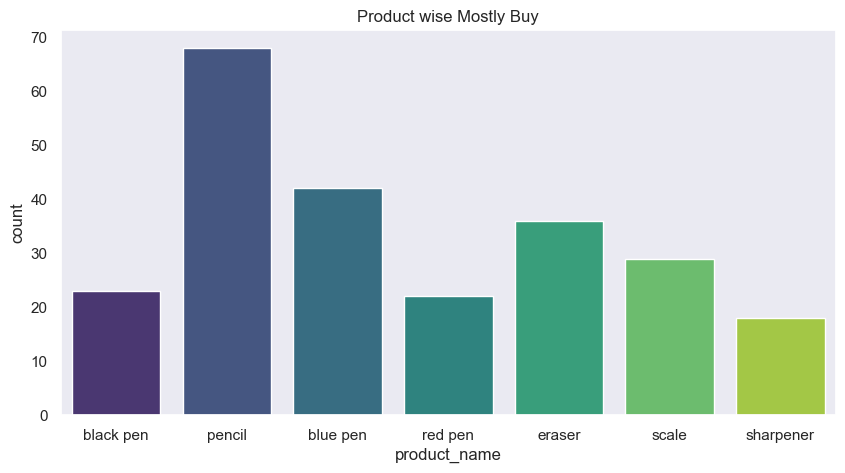

In [8]:
# Show the bar chat which product is most sold in the given data
plt.figure(figsize=(10,5))
sns.set_theme(style='dark')
sns.countplot(data=data,x='product_name',palette='viridis')
plt.title('Product wise Mostly Buy')
plt.show()

# Observations from the data
1. From the above data We clearly understand the pencil is the mani selling product then follwed by blue pen
is the second purchasing product

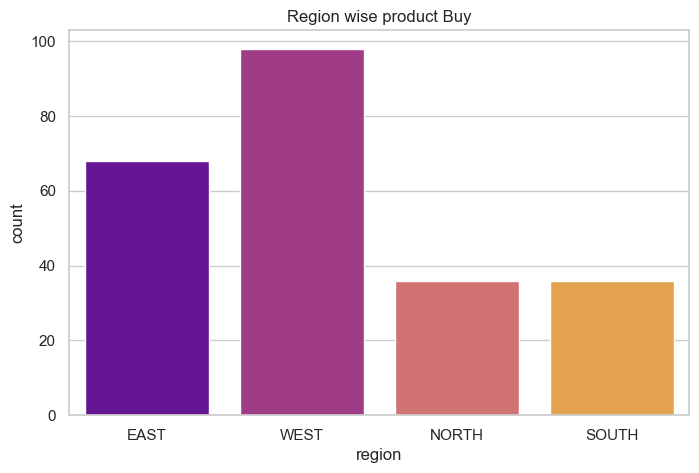

In [9]:
# Find the which region mostly buy the products 
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.countplot(data=data,x='region',palette='plasma')
plt.title('Region wise product Buy')
plt.show()

# Observations from the data

1. From the above data we observe west people are mostly purchase the product. East people are at the second position

In [10]:
'''
Let's assume which product are mostly sold in each region. To find the specific question

I use the groupby function and store the data into the data frame and convert the data 

which should be read full for everyone with background style.

'''

most_selling_product_in_region=pd.DataFrame(data.groupby('product_name')['region'].value_counts())
most_selling_product_in_region.unstack().style.background_gradient(cmap='tab20c_r')

# Observations From the data
1. We Clearly observe the west region people are mostly purchase the each items.
2. East pople,north,south all three region  pencil is the most selling product

In [11]:
'''Adding the new column name as total_price the purpose of the column

to calculate the total price of the each product using basic formula

like quanity * sold price

'''

data['total_price']=data['quantity']*data['sold_price']
data.head(2)

,order_id,order_date,product_id,product_name,quantity,sold_price,customer_id,region,month,total_price
0,101,1-Jan-25,ST01,black pen,1,5,C001,EAST,Jan,5
1,102,2-Jan-25,ST02,pencil,5,10,C005,WEST,Jan,50


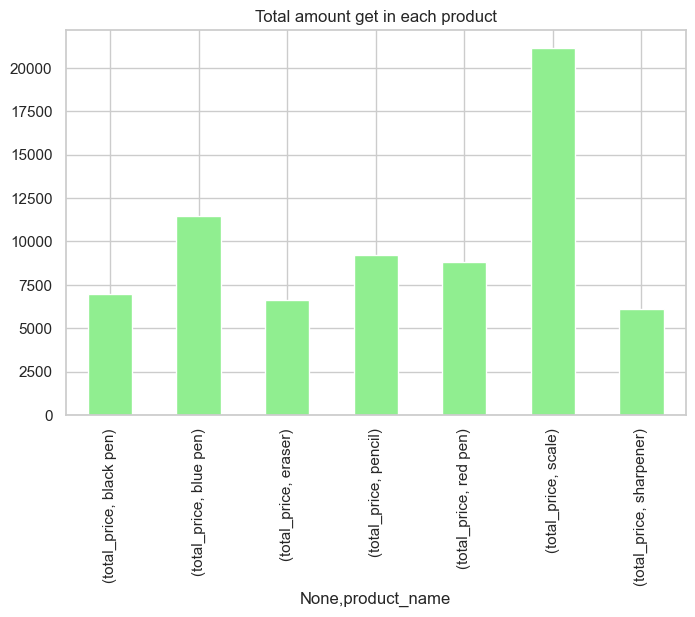

In [12]:
'''
Let's Find the total amount earn each produt we using the groupby function

and create a data frame to store the data and visualize the above information

Through the barplot 
'''
plt.figure(figsize=(8,5))
total_price_each_category=pd.DataFrame(data.groupby('product_name')['total_price'].sum())
total_price_each_category.unstack().plot(kind='bar',color='lightgreen')
plt.title('Total amount get in each product')
plt.show()

# Observation
1. Based on the above data scale is get high amouts.blue pen goes the second place.

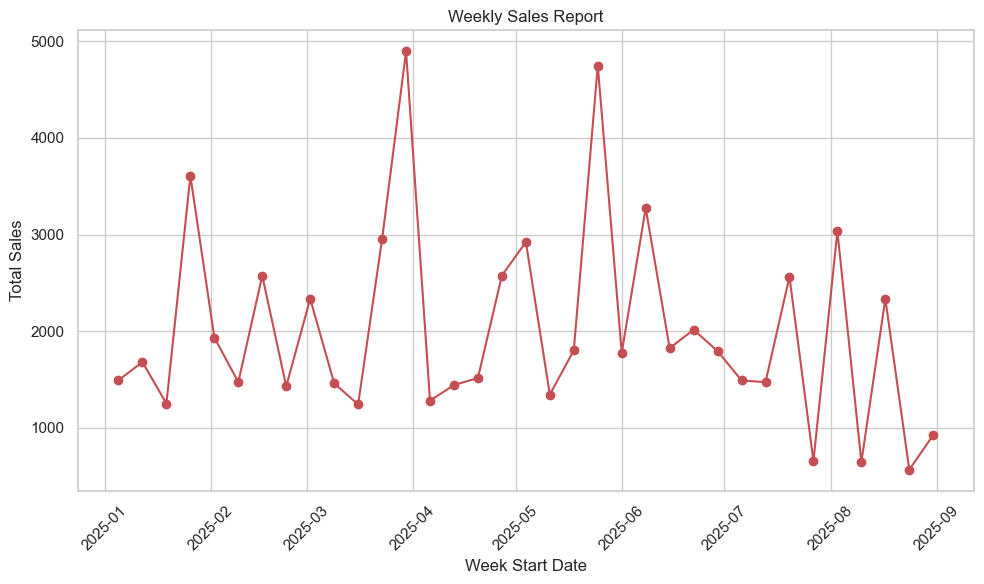

In [13]:
'''
Create a line plot for weekly total price we conver the date column into 

datetime formate and we resample the data and create a plot with weakly 

total sales amount

'''

data['date']=pd.to_datetime(data['order_date'], errors='coerce')
weekly_df = data.resample('W', on='date')['total_price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(weekly_df['date'], weekly_df['total_price'], marker='o', linestyle='-', color='r')
plt.title('Weekly Sales Report')
plt.xlabel('Week Start Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
'''
Create a pivot table with each custmoer and how much they spent the amount

in each product with the data we can easily understad their purchases.

'''

customer_wise_price=pd.DataFrame(pd.pivot_table(data,index='customer_id',columns='product_name',values='total_price'))
customer_wise_price.style.background_gradient(cmap='gist_heat_r')

product_name,black pen,blue pen,eraser,pencil,red pen,scale,sharpener
customer_id,,,,,,,
C001,5.000000,156.857143,114.857143,272.500000,2000.000000,415.000000,nan
C004,43.333333,419.400000,282.500000,95.733333,308.333333,1342.500000,404.000000
C005,162.500000,338.000000,32.000000,92.000000,435.833333,996.666667,507.000000
C058,125.000000,180.000000,62.000000,131.666667,257.000000,967.500000,200.000000
C125,357.857143,169.714286,181.500000,112.000000,245.000000,265.000000,nan
C146,340.000000,163.500000,37.000000,145.888889,162.500000,1576.666667,182.500000
C225,179.000000,90.000000,225.333333,102.444444,1125.000000,320.000000,nan
C475,1160.000000,525.750000,315.111111,198.545455,25.000000,117.500000,nan


<Axes: >

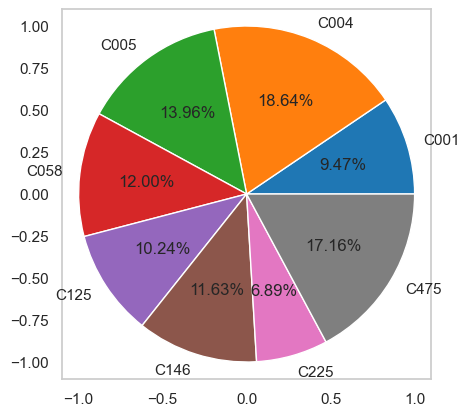

In [15]:
'''
Find The Total Sale done by each customers and how much total percentage purchase

in the data we can create the a pie chart.

'''

total_amount_by_each_customer=pd.DataFrame(data.groupby('customer_id')['total_price'].sum())
total_amount_by_each_customer.unstack().plot(kind='pie',labels=total_amount_by_each_customer.index,
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
    autopct='%.2f%%',
    wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

# Observations
1. From the above pie chats customer id C004 is the high amount purchased, next person will be C005

In [16]:
'''
Monthly Wise Revenue in each product

'''

monthly_wise_profit=pd.DataFrame(data.groupby(['month','product_name'])['total_price'].sum())
monthly_wise_profit.unstack().style.background_gradient(cmap='gist_ncar_r')

In [17]:
# Let's Drop the duplicate Values
data_1=data.drop(['date','month'],axis=1)
data_1.head()

,order_id,order_date,product_id,product_name,quantity,sold_price,customer_id,region,total_price
0,101,1-Jan-25,ST01,black pen,1,5,C001,EAST,5
1,102,2-Jan-25,ST02,pencil,5,10,C005,WEST,50
2,103,3-Jan-25,ST03,blue pen,20,60,C004,WEST,1200
3,104,4-Jan-25,ST03,blue pen,8,24,C125,NORTH,192
4,105,5-Jan-25,ST04,red pen,3,15,C475,EAST,45


# Machine Learning Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
# Covert the categorical columns into the numerical values using the Labelencoder
label=LabelEncoder()
data_1['order_date']=label.fit_transform(data_1['order_date'])
data_1['product_id']=label.fit_transform(data_1['product_id'])
data_1['product_name']=label.fit_transform(data_1['product_name'])
data_1['customer_id']=label.fit_transform(data_1['customer_id'])
data_1['region']=label.fit_transform(data_1['region'])
x=data_1.drop(['total_price'],axis=1)
y=data['total_price']

# Scalling the values
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Split the data into the train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Root Mena Squared Error 203.90109458161666
Mean_squared_error 41575.65637158138
R2_score  88.24478705591672


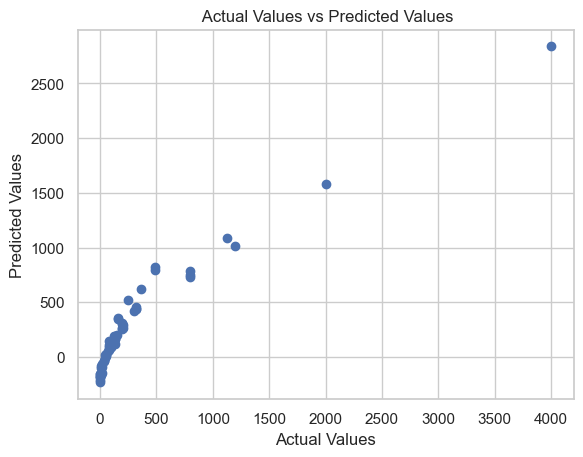

In [23]:
# Model Buliding

def model_buliding(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    model_prediction=model.predict(x_test)
    nsme=mean_squared_error(y_test,model_prediction)
    rmse=np.sqrt(nsme)
    print('Root Mena Squared Error',format(rmse))
    print('Mean_squared_error',format(mean_squared_error(y_test,model_prediction)))
    print('R2_score ',format(r2_score(y_test,model_prediction)*100))
    plt.scatter(y_test, model_prediction)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(" Actual Values vs Predicted Values")
    plt.show()

linear=LinearRegression()
model_buliding(linear,x_train,x_test,y_train,y_test)

Root Mena Squared Error 260.3683608531062
Mean_squared_error 67791.68333333333
R2_score  80.83239705709344


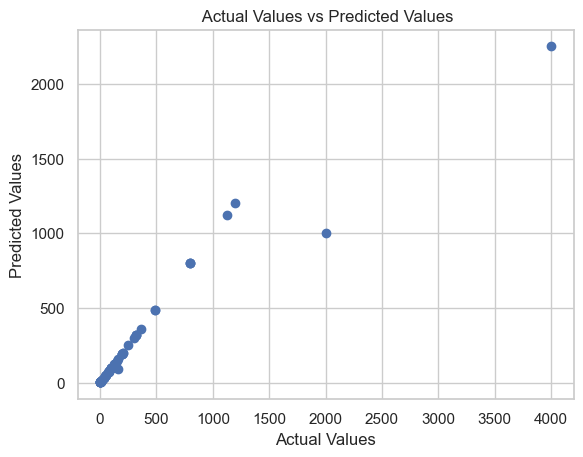

In [26]:
# DecisionTree Regressor model
tree=DecisionTreeRegressor(splitter='best',criterion='squared_error' )
model_buliding(tree,x_train,x_test,y_train,y_test)

Root Mena Squared Error 108.51879990735861
Mean_squared_error 11776.329933333334
R2_score  96.67032878978816


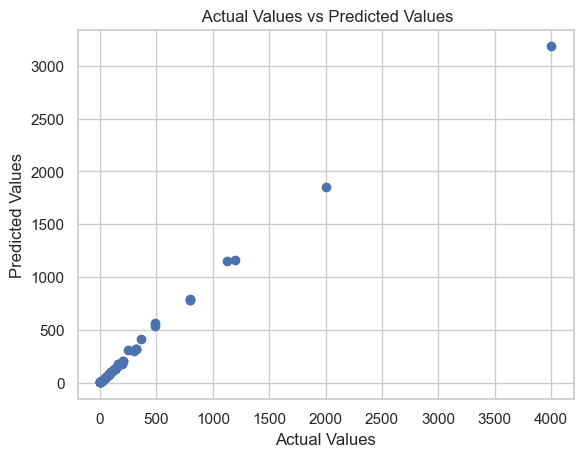

In [25]:
# RandomForest Regressor model
random=RandomForestRegressor(n_estimators=50,criterion='squared_error')
model_buliding(random,x_train,x_test,y_train,y_test)

# SQL Questions
1. Load the Data


SELECT 

FROM Sales_Inventory_Dataset
;
2. Create new colum for total price
ALTER TABLE Sales_Inventory_Dataset
ADD total_price as (quantity * sold_price);
3. subtract the month from the data

SELECT substr(order_date, instr(order_date, '-') + 1, 3) AS month
4. write the query for the top  2 product in the augest month
SELECT sum(total_price) as total_revenue,(product_name) FROM Sales_Inventory_Dataset 
WHERE month='Aug'
GROUP BY product_name
ORDER by total_revenue DESC
LIMIT 2;

##### Answer
sharpener 1580
pencil 1386